In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [4]:
obesity=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
obesity.head(3)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [5]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [6]:
# Gender: Feature, Categorical, "Gender"
# Age : Feature, Continuous, "Age"
# Height: Feature, Continuous
# Weight: Feature Continuous
# family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

# FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
# FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
# NCP : Feature, Continuous, " How many main meals do you have daily? "
# CAEC : Feature, Categorical, " Do you eat any food between meals? "
# SMOKE : Feature, Binary, " Do you smoke? "
# CH2O: Feature, Continuous, " How much water do you drink daily? "
# SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
# FAF: Feature, Continuous, " How often do you have physical activity? "
# TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

# CALC : Feature, Categorical, " How often do you drink alcohol? "
# MTRANS : Feature, Categorical, " Which transportation do you usually use? "
# NObeyesdad : Target, Categorical, "Obesity level"

In [7]:
# Body Mass Index is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9.

In [9]:
obesity.insert(4, 'BMI', obesity['Weight']/(obesity['Height']*obesity['Height']))

In [10]:
obesity.head(3)

,Age,Gender,Height,Weight,BMI,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,24.386526,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,24.238227,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,23.765432,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [11]:
def define_bmi_level(bmi):
    if bmi > 25.0:
        return 'overweight'
    if bmi < 18.5:
        return 'underweight'
    else :
        return 'normal'

In [15]:
obesity.insert(5, 'status', obesity['BMI'].apply(define_bmi_level))

In [16]:
obesity.tail(3)

,Age,Gender,Height,Weight,BMI,status,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2108,22.524036,Female,1.752206,133.689352,43.543817,overweight,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,44.071535,overweight,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,44.144338,overweight,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


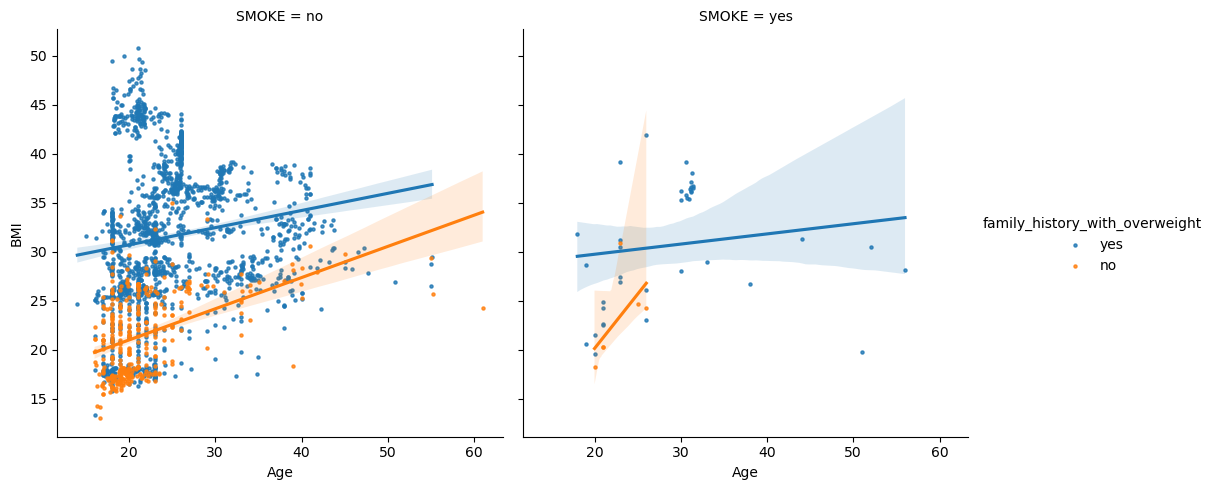

In [19]:
sns.lmplot(
    data=obesity,
    x='Age',
    y='BMI',
    scatter_kws={"s":5},
    hue='family_history_with_overweight',
    col='SMOKE'
)

<Axes: xlabel='Age', ylabel='BMI'>

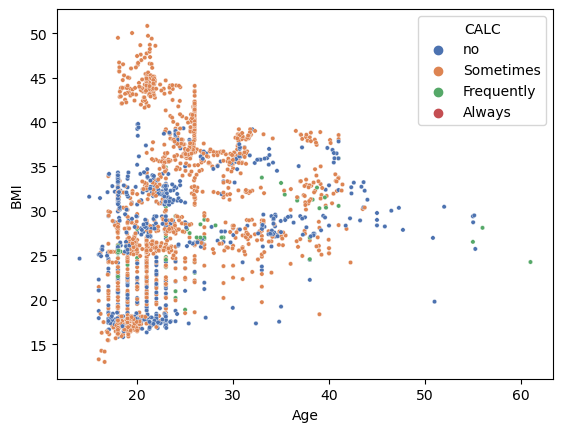

In [24]:
sns.scatterplot(
    data=obesity,
    x='Age',
    y='BMI',
    s=10,
    hue='CALC',
    palette='deep'
)

In [29]:
import numpy as np
obesity['Age']= obesity['Age'].apply(np.ceil)
obesity['TUE']=obesity['TUE'].apply(np.floor)
obesity.nunique()

Age                                 40
Gender                               2
Height                            1574
Weight                            1525
BMI                               1968
status                               3
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                                  3
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [30]:
obesity.tail(3)

,Age,Gender,Height,Weight,BMI,status,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2108,23.0,Female,1.752206,133.689352,43.543817,overweight,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.0,Sometimes,Public_Transportation,Obesity_Type_III
2109,25.0,Female,1.739450,133.346641,44.071535,overweight,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.0,Sometimes,Public_Transportation,Obesity_Type_III
2110,24.0,Female,1.738836,133.472641,44.144338,overweight,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.0,Sometimes,Public_Transportation,Obesity_Type_III


<Axes: xlabel='BMI', ylabel='CALC'>

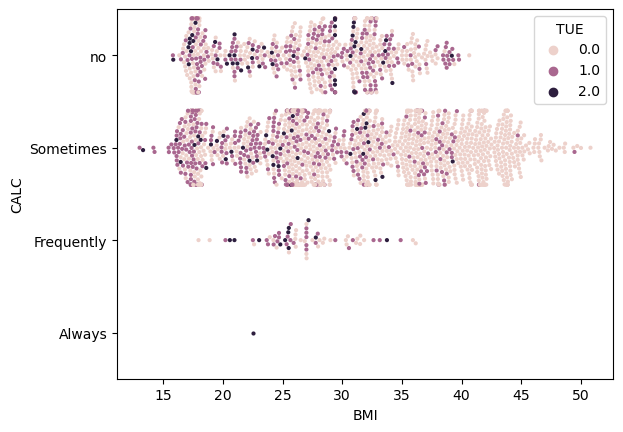

In [36]:
sns.swarmplot(
    data=obesity,
    x='BMI',
    y='CALC',
    hue='TUE',
    size=3
)

In [47]:
obesity['Age'].max()
obesity['Age'].min()

14.0

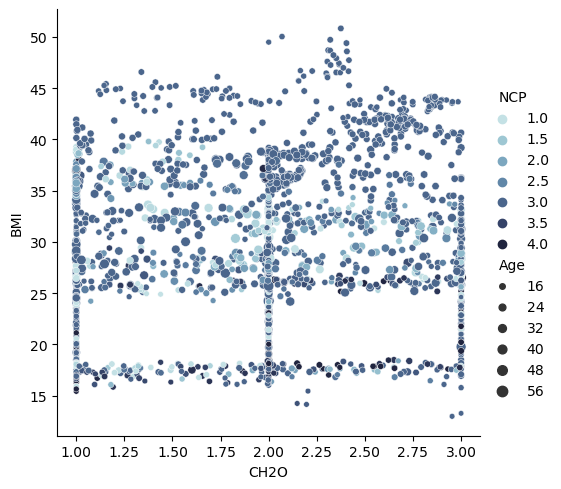

In [57]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g=sns.relplot(
    data=obesity,
    x="CH2O", 
    y="BMI",
    hue="NCP", 
    size="Age",
    palette=cmap, 
    sizes=(14, 61),
)

<Axes: xlabel='TUE', ylabel='BMI'>

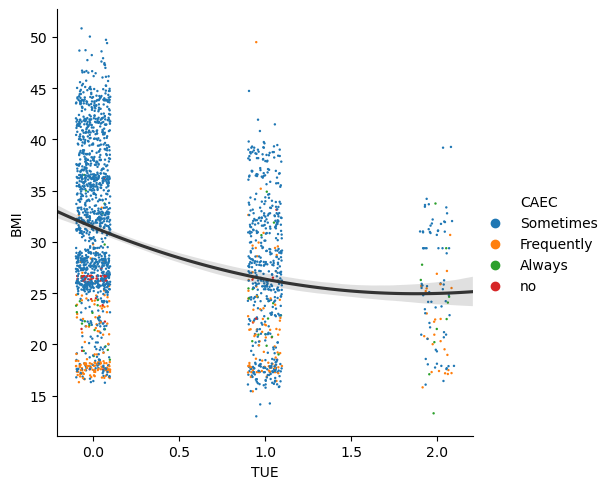

In [64]:
sns.catplot(
    data=obesity, 
    x="TUE", 
    y="BMI", 
    hue="CAEC",
    native_scale=True, 
    zorder=1,
    s=3
)
sns.regplot(
    data=obesity, 
    x="TUE", 
    y="BMI",
    scatter=False, 
    truncate=False, 
    order=2, 
    color=".2",
)